In [2]:
import pandas as pd

# Rutas de archivo
csv_base = "Transmitancia_VeMN18g.csv"
csv_limpio = "Transmitancia_VeMN18g_limpio.csv"

# Leer el archivo .csv completo
with open(csv_base, 'r') as f:
    lineas = f.readlines()

# Detectar línea de encabezado real (donde están los datos)
for i, linea in enumerate(lineas):
    if "nm" in linea and "%T" in linea:
        inicio_datos = i + 1
        break

# Extraer los datos desde ahí
datos = [linea.strip().split(',') for linea in lineas[inicio_datos:] if linea.strip()]

# Crear DataFrame
df = pd.DataFrame(datos, columns=["nm", "%T"])

# Convertir columnas a numérico (XXX.XXX se vuelve NaN automáticamente)
df["nm"] = pd.to_numeric(df["nm"], errors='coerce')
df["%T"] = pd.to_numeric(df["%T"], errors='coerce')

# Guardar como nuevo CSV limpio (NO se eliminan NaN)
df.to_csv(csv_limpio, index=False)
print(f"✅ Archivo limpio creado como: {csv_limpio}")


✅ Archivo limpio creado como: Transmitancia_VeMN18g_limpio.csv


In [3]:
import pandas as pd

In [4]:
datos=pd.read_csv("Transmitancia_VeMN18g_limpio.csv")

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nm      361 non-null    float64
 1   %T      353 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


In [6]:
datos.head()

,nm,%T
0,390.0,NaN
1,391.0,NaN
2,392.0,NaN
3,393.0,NaN
4,394.0,32.986


In [7]:
x=datos["nm"]
y=datos["%T"]

In [8]:
x

0      390.0
1      391.0
2      392.0
3      393.0
4      394.0
       ...  
356    746.0
357    747.0
358    748.0
359    749.0
360    750.0
Name: nm, Length: 361, dtype: float64

In [9]:
y

0         NaN
1         NaN
2         NaN
3         NaN
4      32.986
        ...  
356    88.269
357       NaN
358       NaN
359       NaN
360       NaN
Name: %T, Length: 361, dtype: float64

In [10]:
x.value_counts()

nm
750.0    1
390.0    1
391.0    1
392.0    1
393.0    1
        ..
403.0    1
402.0    1
401.0    1
400.0    1
399.0    1
Name: count, Length: 361, dtype: int64

In [12]:
y.value_counts()

%T
68.895    2
87.583    2
86.911    2
35.801    1
38.713    1
         ..
44.666    1
45.554    1
47.087    1
48.544    1
35.784    1
Name: count, Length: 350, dtype: int64

<Axes: xlabel='nm', ylabel='%T'>

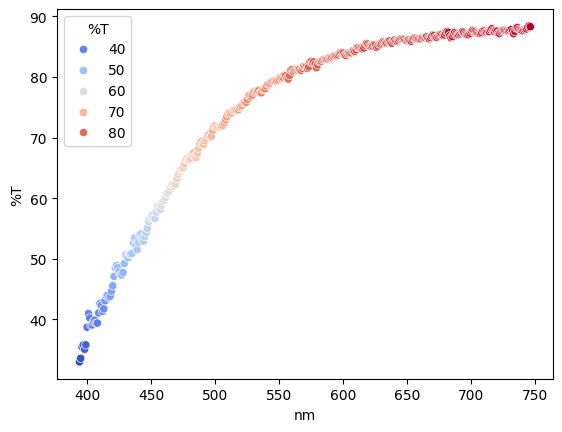

In [14]:
import seaborn as sb
sb.scatterplot(x="nm", y="%T", data=datos, hue="%T", palette="coolwarm")

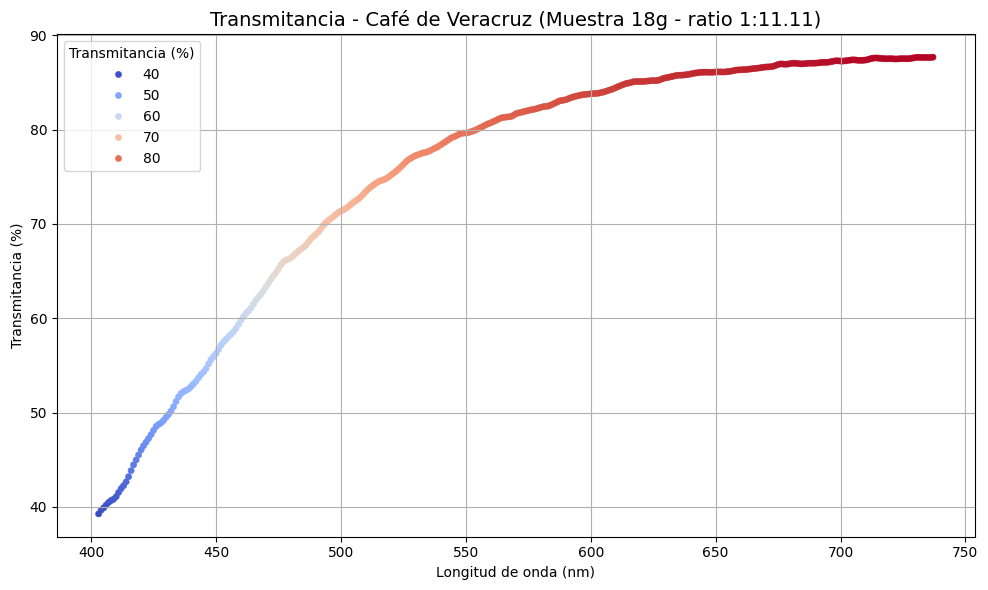

In [16]:
from scipy.signal import savgol_filter
import seaborn as sb
import matplotlib.pyplot as plt

# Crear columna suavizada
datos['T_suave'] = savgol_filter(datos['%T'], window_length=19, polyorder=3)

# Graficar scatterplot con suavizado y gradiente de color
plt.figure(figsize=(10, 6))
sb.scatterplot(x='nm', y='T_suave', data=datos, hue='T_suave', palette='coolwarm', s=20, edgecolor=None)
plt.title("Transmitancia - Café de Veracruz (Muestra 18g - ratio 1:11.11)", fontsize=14)
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Transmitancia (%)")
plt.legend(title="Transmitancia (%)", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()
